In [11]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10.0):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [10]:
import pandas as pd

df = pd.read_csv('dist5.csv')
df.tail()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,STATE_UT_NAME
244,7.1,3.2,2.8,1.7,6.5,73.3,295.3,303.6,120.0,25.2,9.7,4.3,852.7,RAJASTHAN
245,8.7,7.0,4.2,4.1,12.8,52.4,237.0,228.2,94.5,17.1,4.7,4.1,674.8,RAJASTHAN
246,4.0,2.2,3.7,2.6,12.3,68.1,176.8,177.6,83.5,13.7,6.9,3.1,554.5,RAJASTHAN
247,9.1,7.7,3.5,2.4,9.9,50.8,220.5,269.8,96.3,17.0,5.4,3.8,696.2,RAJASTHAN
248,3.6,1.2,3.4,3.3,5.8,108.3,283.3,290.4,163.8,32.8,16.4,3.0,915.3,RAJASTHAN


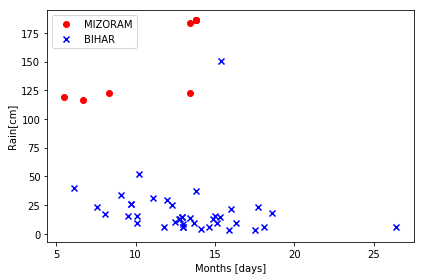

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select MIZORAM and BIHAR
y = df.iloc[0:48, 13].values
y = np.where(y == 'MIZORAM', -1, 1)

# extract RAIN IN JAN,FEB,MARCH
X = df.iloc[0:48, [0, 3]].values

# plot data
plt.scatter(X[:8, 0], X[:8, 1],
            color='red', marker='o', label='MIZORAM')
plt.scatter(X[8:48, 0], X[8:48, 1],
            color='blue', marker='x', label='BIHAR')

plt.xlabel('Months [days]')
plt.ylabel('Rain[cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./iris_1.png', dpi=300)
plt.show()

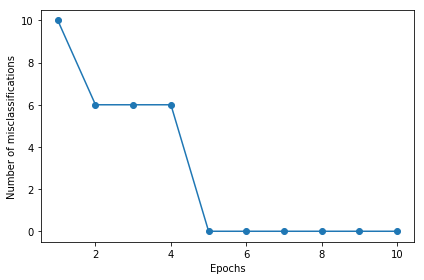

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

In [14]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

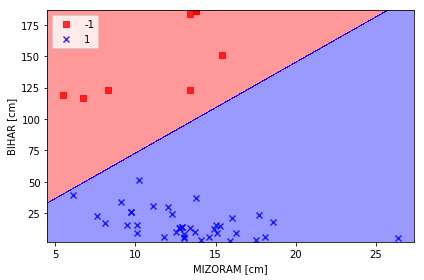

In [16]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('MIZORAM [cm]')
plt.ylabel('BIHAR [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()